In [22]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv("homePrices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


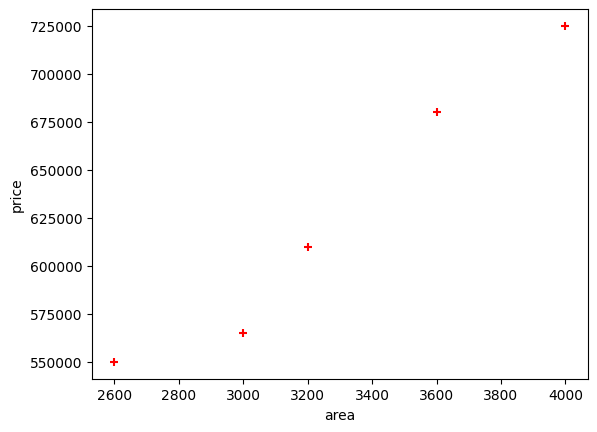

In [24]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')

In [28]:
new_df=df.drop("price",axis="columns")
new_df


,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [27]:
y = df.price
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [31]:
model=linear_model.LinearRegression()

model

LinearRegression()

In [32]:
model.fit(new_df,y)


LinearRegression()

c:\Users\patel\github\foundation-ml\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [36]:
model.coef_

array([135.78767123])

In [37]:
model.intercept_

180616.43835616432

In [38]:
# y = m * X + b
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

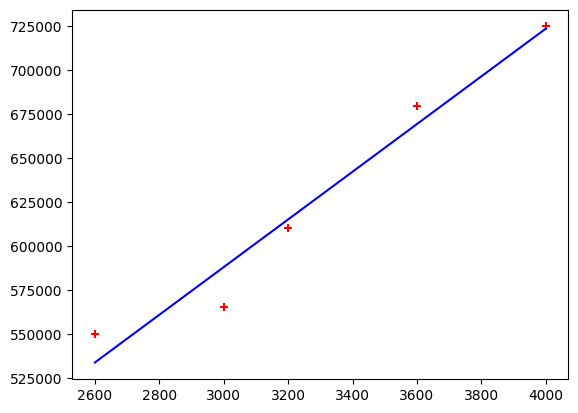

In [39]:
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, model.predict(new_df), color='blue')

In [42]:
area_df=pd.read_csv("areas.csv")
area_df.head(5)

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [45]:
y_pred=model.predict(area_df)
y_pred

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [46]:
area_df["prices"]=y_pred
area_df.head(5)

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [47]:
area_df.to_csv("prediction.csv")

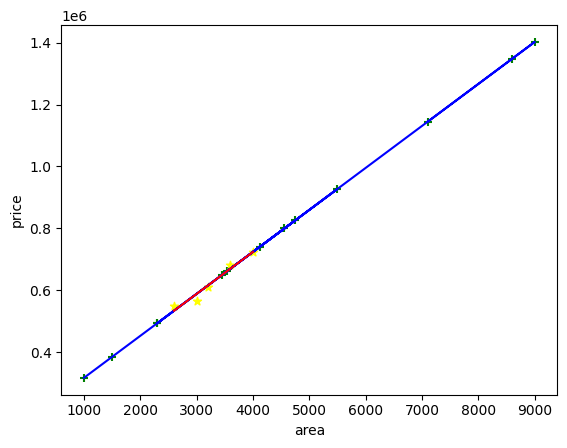

In [60]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(area_df.area,area_df.prices, color='green', marker='+')
plt.scatter(df.area, df.price, color='yellow', marker='*')
plt.plot(area_df.area,y_pred, color='blue')
plt.plot(df.area,model.predict(new_df), color='red')
